<a href="https://colab.research.google.com/github/eledesma/EstadisticaICESI/blob/main/SOLUCI%C3%93N_PARCIAL_PARTE_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parte 2 de la prueba de seguimiento


1. ¿Cuál es la tendencia general de la tasa de desempleo (TD_13ciudades) a lo largo del tiempo en los datos proporcionados?

2. Si analizamos los datos, ¿qué relación podrías establecer entre el número de ocupados y el número de desocupados en un mes determinado? Explica con ejemplos.

3. Según los datos, ¿cómo afecta la variación en el número de inactivos a la tasa de desempleo promedio?

4. Observando los datos de ocupados, desocupados e inactivos, ¿qué mes y año destacan por tener un cambio significativo en estos indicadores? Explica por qué podría suceder.

5. Si quisieras predecir la tasa de desempleo de los próximos meses basándote en los datos proporcionados, ¿qué variables considerarías más importantes y por qué?

6. ¿Cómo podrías representar gráficamente la relación entre los ocupados y desocupados para identificar posibles patrones o correlaciones? Explica qué tipo de gráfico sería más adecuado y por qué.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data="/content/datosEmpleo.csv"
df=pd.read_csv(data, delimiter=';', decimal=',')
df.head()

,mes,TD_13ciudades,Ocupados,Desocupados,Inactivos
0,ene-01,20.9,6.924,1.835,4.601
1,feb-01,19.9,7.038,1.748,4.597
2,mar-01,19.2,6.946,1.653,4.807
3,abr-01,17.9,6.973,1.519,4.937
4,may-01,17.9,6.994,1.530,4.929


In [ ]:
# Separar la columna 'mes' en dos nuevas columnas 'mes' y 'año'
df[['mes', 'año']] = df['mes'].str.split('-', expand=True)

In [ ]:
df.head()

,mes,TD_13ciudades,Ocupados,Desocupados,Inactivos
0,ene-01,20.9,6.924,1.835,4.601
1,feb-01,19.9,7.038,1.748,4.597
2,mar-01,19.2,6.946,1.653,4.807
3,abr-01,17.9,6.973,1.519,4.937
4,may-01,17.9,6.994,1.530,4.929


In [ ]:
df

,mes,TD_13ciudades,Ocupados,Desocupados,Inactivos,año
0,ene,20.9,6.924,1.835,4.601,01
1,feb,19.9,7.038,1.748,4.597,01
2,mar,19.2,6.946,1.653,4.807,01
3,abr,17.9,6.973,1.519,4.937,01
4,may,17.9,6.994,1.530,4.929,01
...,...,...,...,...,...,...
215,dic,10.7,10.835,1.302,6.143,18
216,ene,13.7,10.314,1.643,6.343,19
217,feb,12.4,10.558,1.498,6.264,19
218,mar,12.0,10.761,1.464,6.116,19


1. ¿Cuál es la tendencia general de la tasa de desempleo (TD_13ciudades) a lo largo del tiempo en los datos proporcionados?

In [ ]:
df['TD_13ciudades']

# Convert 'mes' into a datetime format (assuming the data is monthly with year '01')
df['mes'] = pd.to_datetime(df['mes'], format='%b-%y', errors='coerce')


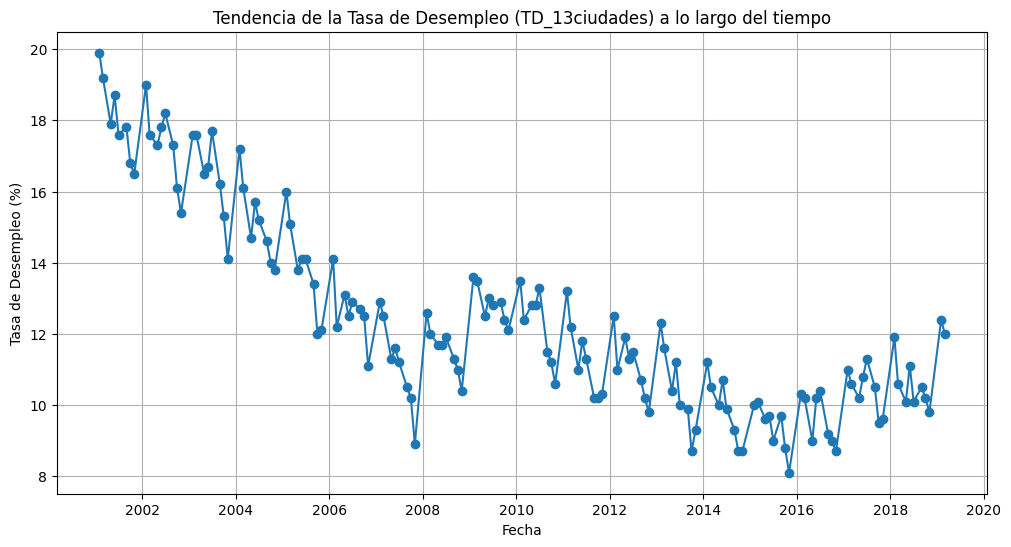

In [ ]:
import matplotlib.pyplot as plt

# Filter rows with valid dates for plotting
valid_data = df.dropna(subset=['mes'])

# Plot the trend of unemployment rate over time
plt.figure(figsize=(12, 6))
plt.plot(valid_data['mes'], valid_data['TD_13ciudades'], marker='o', linestyle='-')
plt.title('Tendencia de la Tasa de Desempleo (TD_13ciudades) a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Tasa de Desempleo (%)')
plt.grid(True)
plt.show()


2. Si analizamos los datos, ¿qué relación podrías establecer entre el número de ocupados y el número de desocupados en un mes determinado? Explica con ejemplos

In [ ]:
correlation = df[['Ocupados', 'Desocupados']].corr()

# Display the correlation
correlation



,Ocupados,Desocupados
Ocupados,1.000000,0.022582
Desocupados,0.022582,1.000000


from matplotlib import pyplot as plt
correlation['Ocupados'].plot(kind='hist', bins=20, title='Ocupados')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
correlation['Desocupados'].plot(kind='hist', bins=20, title='Desocupados')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
correlation.plot(kind='scatter', x='Ocupados', y='Desocupados', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Desocupados']
  ys = series['Ocupados']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = correlation.sort_values('Desocupados', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Desocupados')
_ = plt.ylabel('Ocupados')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Desocupados']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Desocupados'}, axis=1)
              .sort_values('Desocupados', ascending=True))
  xs = counted['Desocupados']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = correlation.sort_values('Desocupados', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Desocupados')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
correlation['Ocupados'].plot(kind='line', figsize=(8, 4), title='Ocupados')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
correlation['Desocupados'].plot(kind='line', figsize=(8, 4), title='Desocupados')
plt.gca().spines[['top', 'right']].set_visible(False)

3. Según los datos, ¿cómo afecta la variación en el número de inactivos a la tasa de desempleo promedio?

In [ ]:
# Calculate the correlation between 'Inactivos' and 'TD_13ciudades'
correlation_inactivos = df[['Inactivos', 'TD_13ciudades']].corr().iloc[0, 1]

correlation_inactivos

-0.6836004025792296

Text(0, 0.5, 'Tasa de Desempleo (%)')

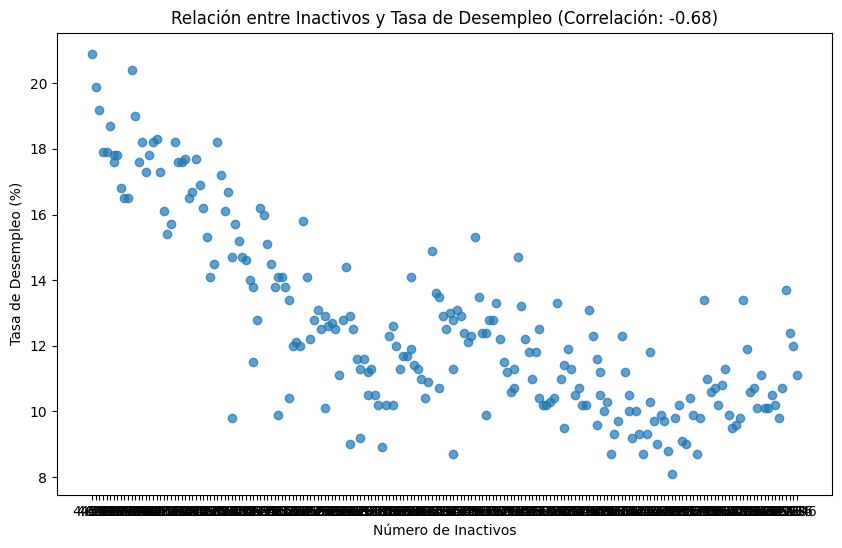

In [ ]:

# Visualize the relationship with a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Inactivos'], df['TD_13ciudades'], alpha=0.7)
plt.title(f'Relación entre Inactivos y Tasa de Desempleo (Correlación: {correlation_inactivos:.2f})')
plt.xlabel('Número de Inactivos')
plt.ylabel('Tasa de Desempleo (%)')

Sentido de la relación:

La correlación negativa indica que, en general, cuando el número de inactivos aumenta, la tasa de desempleo tiende a disminuir. Es decir, existe una relación inversa entre estas dos variables.
Magnitud de la relación:

Un valor de
−
0.68
sugiere una relación moderada a fuerte. Aunque no es una correlación perfecta (
−1), es significativa y muestra un patrón claro.
Posibles explicaciones:

Definición de "inactivos": Los inactivos son personas que no están trabajando ni buscando trabajo activamente (por ejemplo, estudiantes, jubilados, o personas dedicadas a labores domésticas). Estas personas no se cuentan como "desempleadas".

4. Si analizamos los datos, ¿qué relación podrías establecer entre el número de ocupados y el número de desocupados en un mes determinado? Explica con ejemplos

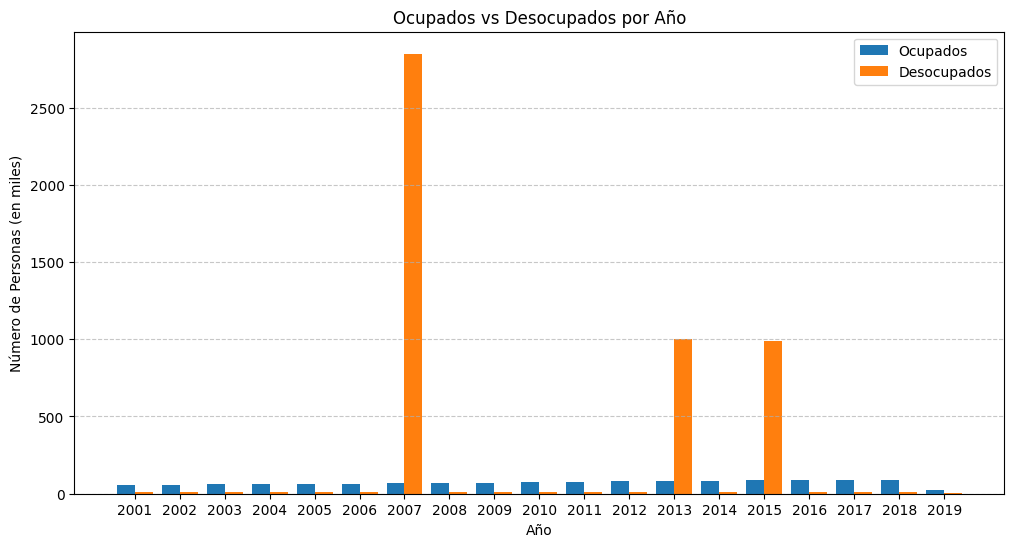

In [ ]:
# Extract year from the 'mes' column
df['Año'] = df['mes'].dt.year

# Group by year and calculate the sum of 'Ocupados' and 'Desocupados'
annual_data = df.groupby('Año')[['Ocupados', 'Desocupados']].sum().reset_index()

# Create a double bar chart for 'Ocupados' and 'Desocupados'
plt.figure(figsize=(12, 6))
x = annual_data['Año']
width = 0.4  # Width of the bars

# Plot bars for 'Ocupados'
plt.bar(x - width / 2, annual_data['Ocupados'], width=width, label='Ocupados')

# Plot bars for 'Desocupados'
plt.bar(x + width / 2, annual_data['Desocupados'], width=width, label='Desocupados')

#Plot
plt.title('Ocupados vs Desocupados por Año')
plt.xlabel('Año')
plt.ylabel('Número de Personas (en miles)')
plt.xticks(x)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
